<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/classify_cuisine_from_recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: To determine cuisine given a recipe

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',None)

Read the data 

Source: IBM

In [43]:
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

In [4]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [50]:
recipes.shape

(57691, 384)

Our data has 57691 rows [recipes] with 384 columns [ingredients].

Let's check if they are homogenous


In [44]:
recipes.country.unique()

array(['Vietnamese', 'Indian', 'Spanish_Portuguese', 'Jewish', 'French',
       'Central_SouthAmerican', 'Cajun_Creole', 'Thai', 'Scandinavian',
       'Greek', 'American', 'African', 'MiddleEastern',
       'EasternEuropean_Russian', 'Italian', 'Irish', 'Mexican',
       'Chinese', 'German', 'Mediterranean', 'Japanese', 'Moroccan',
       'Southern_SoulFood', 'English_Scottish', 'Asian', 'Southwestern',
       'chinese', 'mexico', 'japanese', 'east_asian', 'asian', 'western',
       'korean', 'italian', 'Canada', 'Turkey', 'Caribbean', 'Bangladesh',
       'India', 'France', 'Italy', 'Israel', 'Korea', 'Iran',
       'Eastern-Europe', 'South-African', 'UK-and-Ireland', 'China',
       'Belgium', 'Germany', 'South-America', 'Spain', 'Netherlands',
       'Scandinavia', 'Philippines', 'Indonesia', 'East-African',
       'Vietnam', 'Thailand', 'Switzerland', 'West-African',
       'North-African', 'Pakistan', 'Portugal', 'Mexico', 'Lebanon',
       'Malaysia', 'Austria', 'Japan'], dtype=

Looking at data, many inconsistencies were found:
1. Country name is used instead of cuisine
2. Some start with capital letter, others with small
3. Indian and India both exist
4. America has high amount of data compared to others

## Lets fix these problems


change column name contry to cuisine

In [45]:
recipes.rename(columns = {'country':'cuisine'},inplace=True )

Make all values lowercase

In [46]:
recipes.cuisine = recipes.cuisine.str.lower()

change cuisine values consistent

In [59]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "bangladesh", "cuisine"] = "bangladeshi"

remove cuisines with less than 50 data

In [75]:
cuisin_list = list(recipes.cuisine.value_counts()[recipes.cuisine.value_counts()>50].index)

recipes = recipes[recipes.cuisine.isin(cuisin_list)]

convert 'yes','no' to 1/0

In [77]:
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

#### What are the 3 most popular ingredients?


In [95]:
recipes.sum()[1:].sort_values(ascending=False).head(3)

egg       21022
wheat     20775
butter    20715
dtype: object

data is biased towards american because of high volume of american recipe data.

Let's find popular ingredients per cuisine

In [139]:
def pop_ing(ings):
    print(ings.name, ":",ings.sort_values(ascending=False)[:4].index.values)


In [141]:
a = recipes.groupby('cuisine').mean().apply(pop_ing,axis=1)

african : ['onion' 'olive_oil' 'garlic' 'cumin']
american : ['butter' 'egg' 'wheat' 'onion']
asian : ['soy_sauce' 'ginger' 'garlic' 'rice']
cajun_creole : ['onion' 'cayenne' 'garlic' 'butter']
canadian : ['wheat' 'butter' 'egg' 'onion']
caribbean : ['onion' 'garlic' 'vegetable_oil' 'black_pepper']
central_southamerican : ['garlic' 'onion' 'cayenne' 'tomato']
chinese : ['soy_sauce' 'ginger' 'garlic' 'scallion']
east_asian : ['garlic' 'soy_sauce' 'scallion' 'cayenne']
eastern-europe : ['wheat' 'egg' 'butter' 'onion']
easterneuropean_russian : ['butter' 'egg' 'wheat' 'onion']
english_scottish : ['butter' 'wheat' 'egg' 'cream']
french : ['butter' 'egg' 'wheat' 'olive_oil']
german : ['wheat' 'egg' 'butter' 'onion']
greek : ['olive_oil' 'garlic' 'onion' 'lemon_juice']
indian : ['cumin' 'turmeric' 'onion' 'coriander']
italian : ['olive_oil' 'garlic' 'tomato' 'onion']
japanese : ['soy_sauce' 'rice' 'vinegar' 'vegetable_oil']
jewish : ['egg' 'wheat' 'butter' 'onion']
korean : ['garlic' 'scallio

# MODELING

since data is biased towards american cuisine we'll opt for creating diff decision trees for diff branches of cuisine 

decision tree for the recipes for just 
Asian (Korean, Japanese, Chinese, Thai) and Indian cuisine

In [150]:
asian_branch = recipes[recipes.cuisine.isin(["korean","japanese","chinese","thai","indian"])]

asian_features = asian_branch.iloc[:,1:]
asian_target = asian_branch.cuisine

In [160]:
import  sklearn.tree as tree

import matplotlib.pyplot as plt

In [154]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(asian_features,asian_target)

DecisionTreeClassifier(max_depth=3)

Plot the Tree

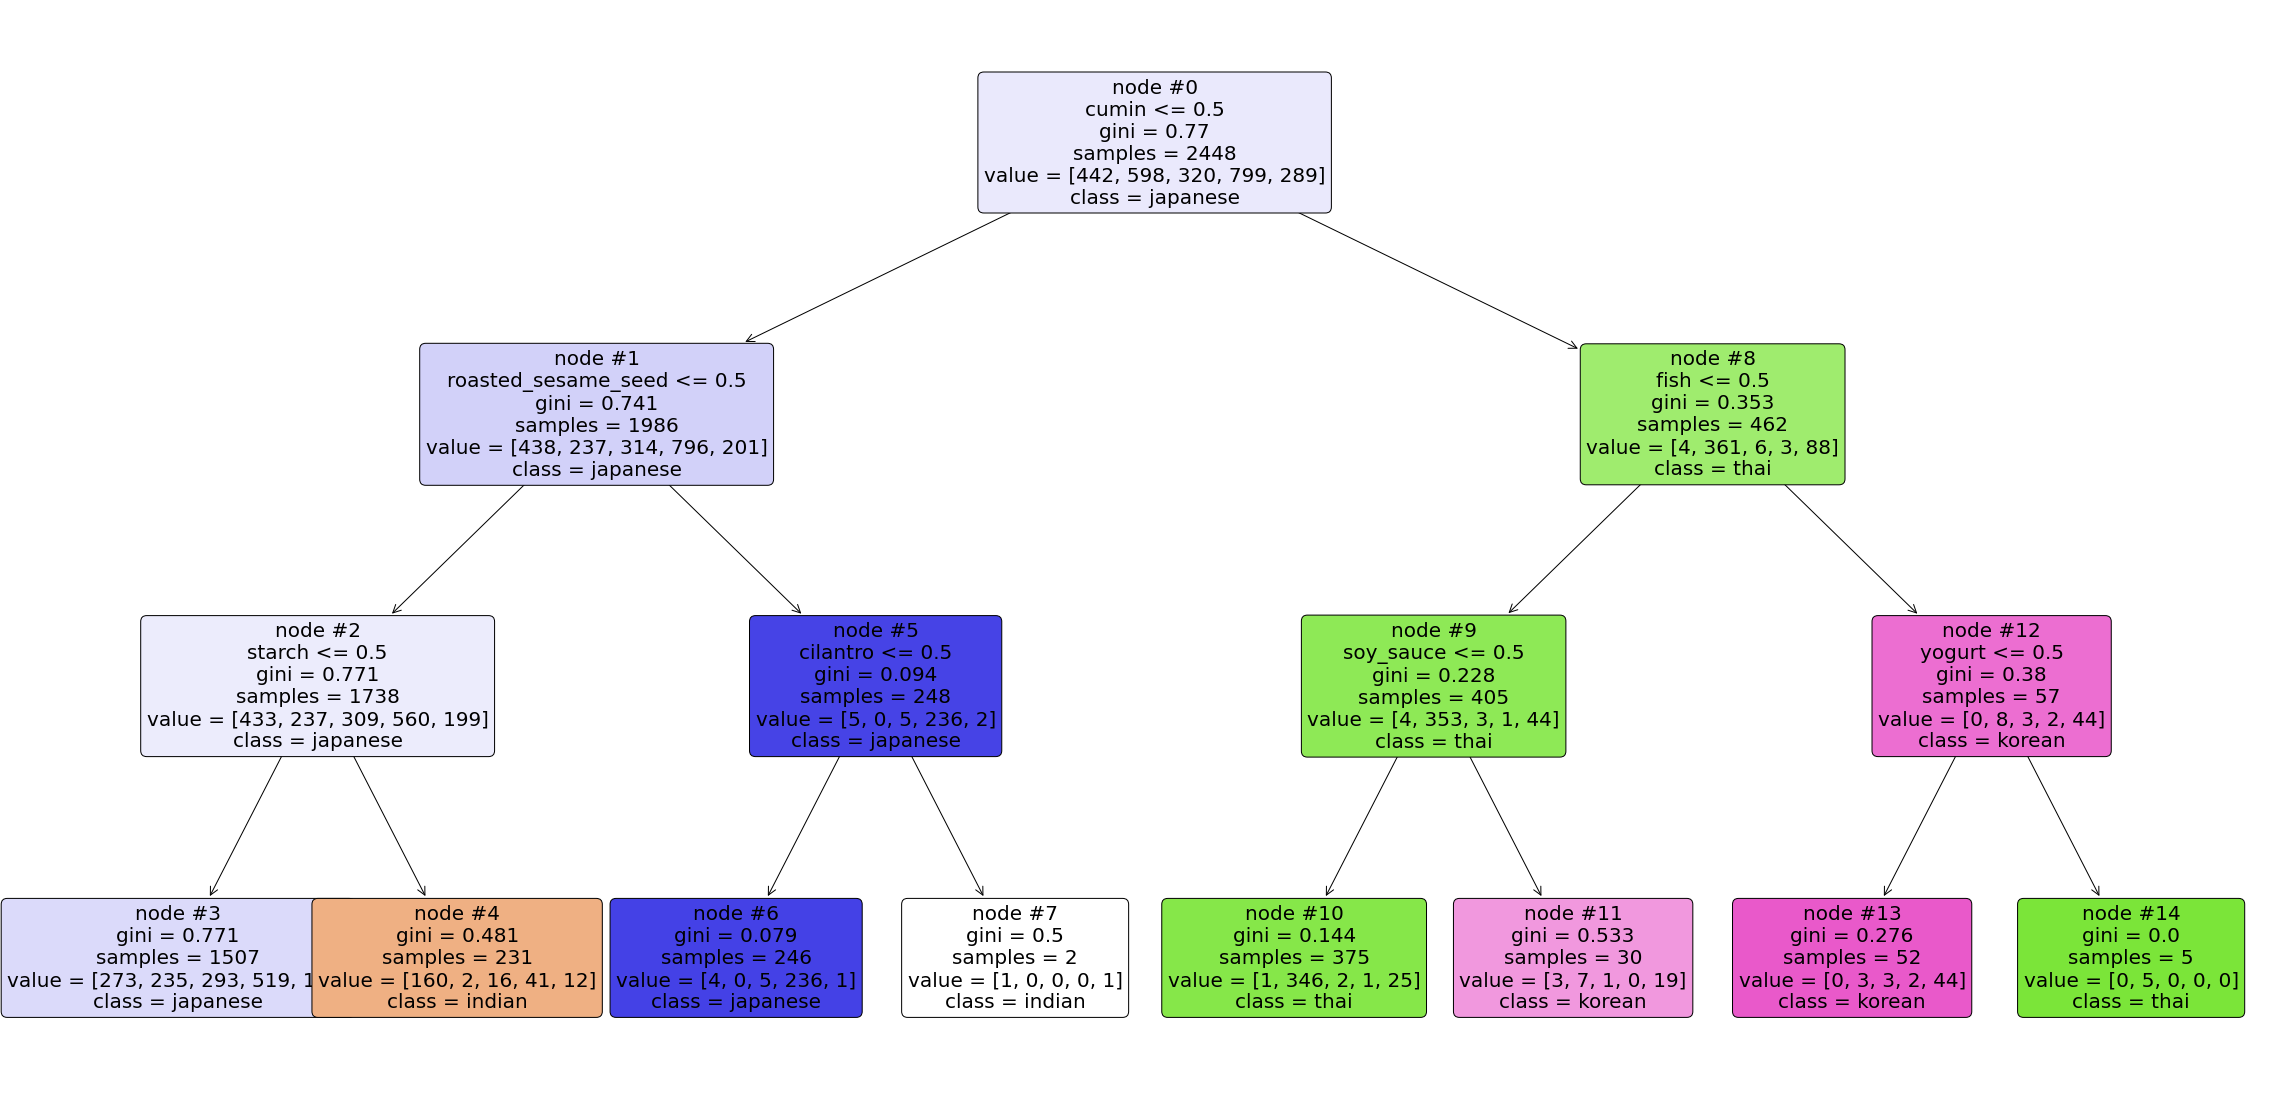

In [162]:
plt.figure(figsize=(40,20))
tree.plot_tree(clf, feature_names=list(asian_features.columns), class_names=asian_target.unique(), filled=True, node_ids=True, rounded=True, fontsize=20);

Evaluate our model

In [143]:
from sklearn.model_selection import train_test_split as tts

In [169]:
x_train,x_test,y_train,y_test = tts(asian_features,asian_target,test_size=0.20,random_state=45)

In [170]:
asian_tree = tree.DecisionTreeClassifier(max_depth=3)
asian_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [203]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay


In [171]:
np.mean(asian_tree.predict(x_test) == y_test) # accuracy_score(asian_tree.predict(x_test), y_test)

0.5244897959183673

In [202]:
cm = confusion_matrix(y_test, asian_tree.predict(x_test), labels = y_test.unique() )      #,normalize='true'))
cm

array([[ 10,  29,   4,   9,   0],
       [  0, 115,   0,  43,   0],
       [  2,  40,  71,   0,   0],
       [  0,  35,   0,  61,   0],
       [  2,  27,   2,  40,   0]])

In [176]:
y_test.unique()

array(['thai', 'korean', 'indian', 'chinese', 'japanese'], dtype=object)

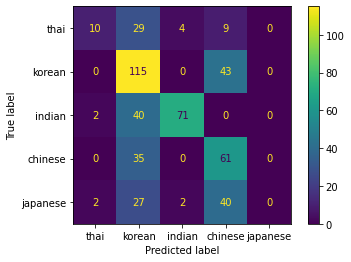

In [205]:
ConfusionMatrixDisplay(cm,display_labels= y_test.unique()).plot();

In [206]:
cm.sum()

490